<a href="https://colab.research.google.com/github/TawfiqGmen/artificial-intellgince-project/blob/main/Price_Prediction_using_LSTM_and_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
import math
import pandas_datareader as web
import yfinance as yf

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
data = yf.download('^NSEBANK', start=datetime.datetime(2000, 1, 2), end=date.today())
data = data[['Adj Close']]
data.columns = ['Price']
data.head()

[*********************100%***********************]  1 of 1 completed


,Price
Date,
2007-09-17 00:00:00+00:00,6897.020020
2007-09-18 00:00:00+00:00,7059.567871
2007-09-19 00:00:00+00:00,7401.764160
2007-09-20 00:00:00+00:00,7390.063965
2007-09-21 00:00:00+00:00,7464.413086


In [10]:
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 3935 number of days in the dataset.


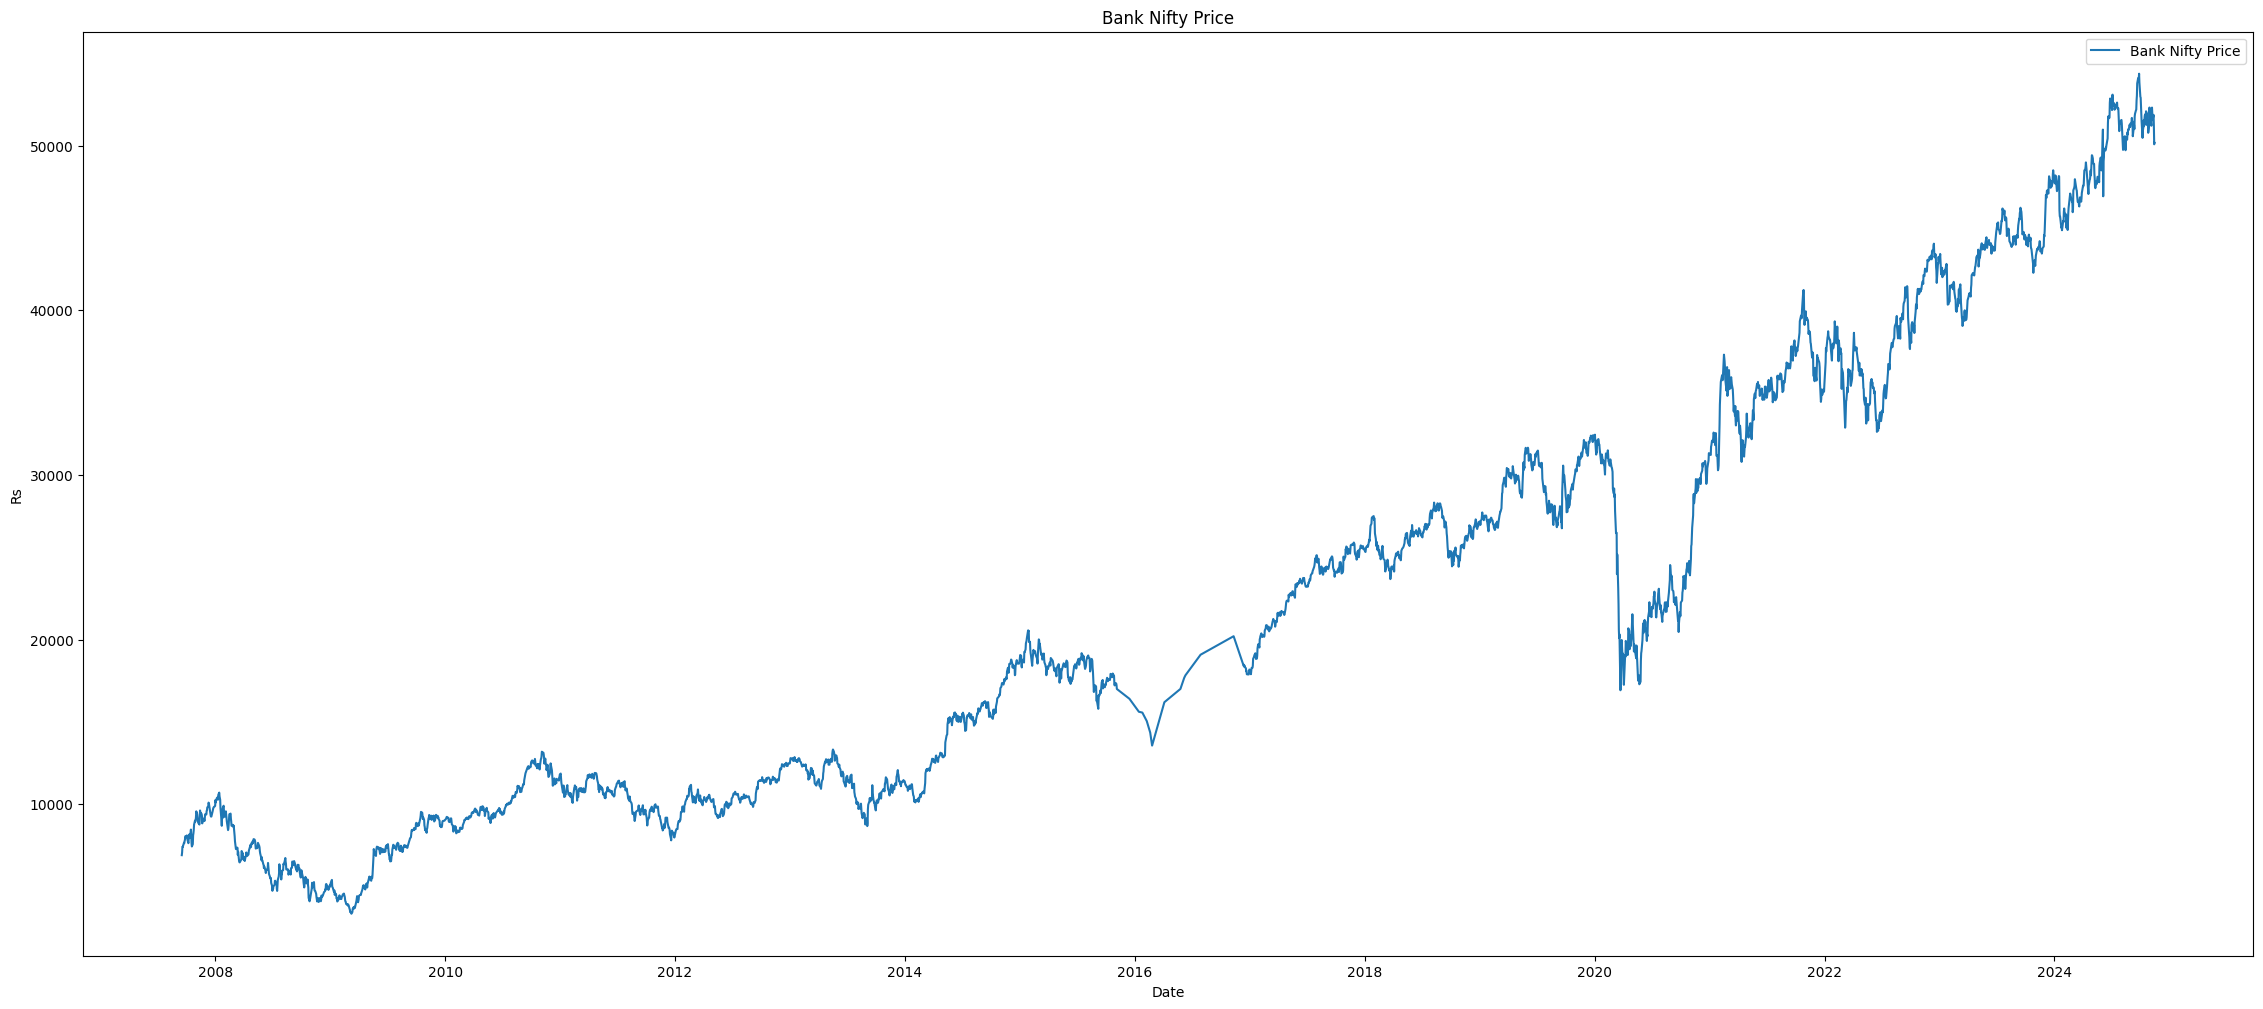

In [11]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(data.index, data['Price'], label='Bank Nifty Price')
plt.xlabel('Date')
plt.ylabel('Rs')
plt.title('Bank Nifty Price')
plt.legend()
plt.show()

In [12]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Price'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Price'].rolling(window=21).mean()

    # Create MACD
    dataset['26ema'] = dataset['Price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Price'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema']-dataset['26ema']

    # Create Bollinger Bands
    dataset['20sd'] = dataset['Price'].rolling(window = 21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)

    # Create Exponential moving average
    dataset['ema'] = dataset['Price'].ewm(com=0.5).mean()

    # Create Momentum
    dataset['momentum'] = dataset['Price']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])
    return dataset

In [13]:
df = get_technical_indicators(data)

In [14]:
df = df.dropna()
df.head()

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2007-10-16 00:00:00+00:00,8452.101562,8054.791922,7784.471354,7923.731019,8042.612357,118.881339,386.856369,8558.184092,7010.758617,8363.607803,8451.101562,9.042052
2007-10-17 00:00:00+00:00,8099.805664,8122.434012,7841.746861,7939.713390,8051.640133,111.926742,334.374992,8510.496844,7172.996878,8187.739710,8098.805664,8.999472
2007-10-18 00:00:00+00:00,7608.661621,8081.420201,7867.894182,7910.157159,7981.996045,71.838886,288.470113,8444.834409,7290.953956,7801.687651,7607.661621,8.936911
2007-10-19 00:00:00+00:00,7423.713379,7994.728306,7868.939383,7867.378049,7894.519035,27.140986,286.731283,8442.401949,7295.476817,7549.704803,7422.713379,8.912300
2007-10-22 00:00:00+00:00,7567.912109,7910.329311,7877.408343,7841.402490,7843.488268,2.085778,274.234037,8425.876416,7328.940269,7561.843007,7566.912109,8.931540


In [15]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days

    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(30,20))
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

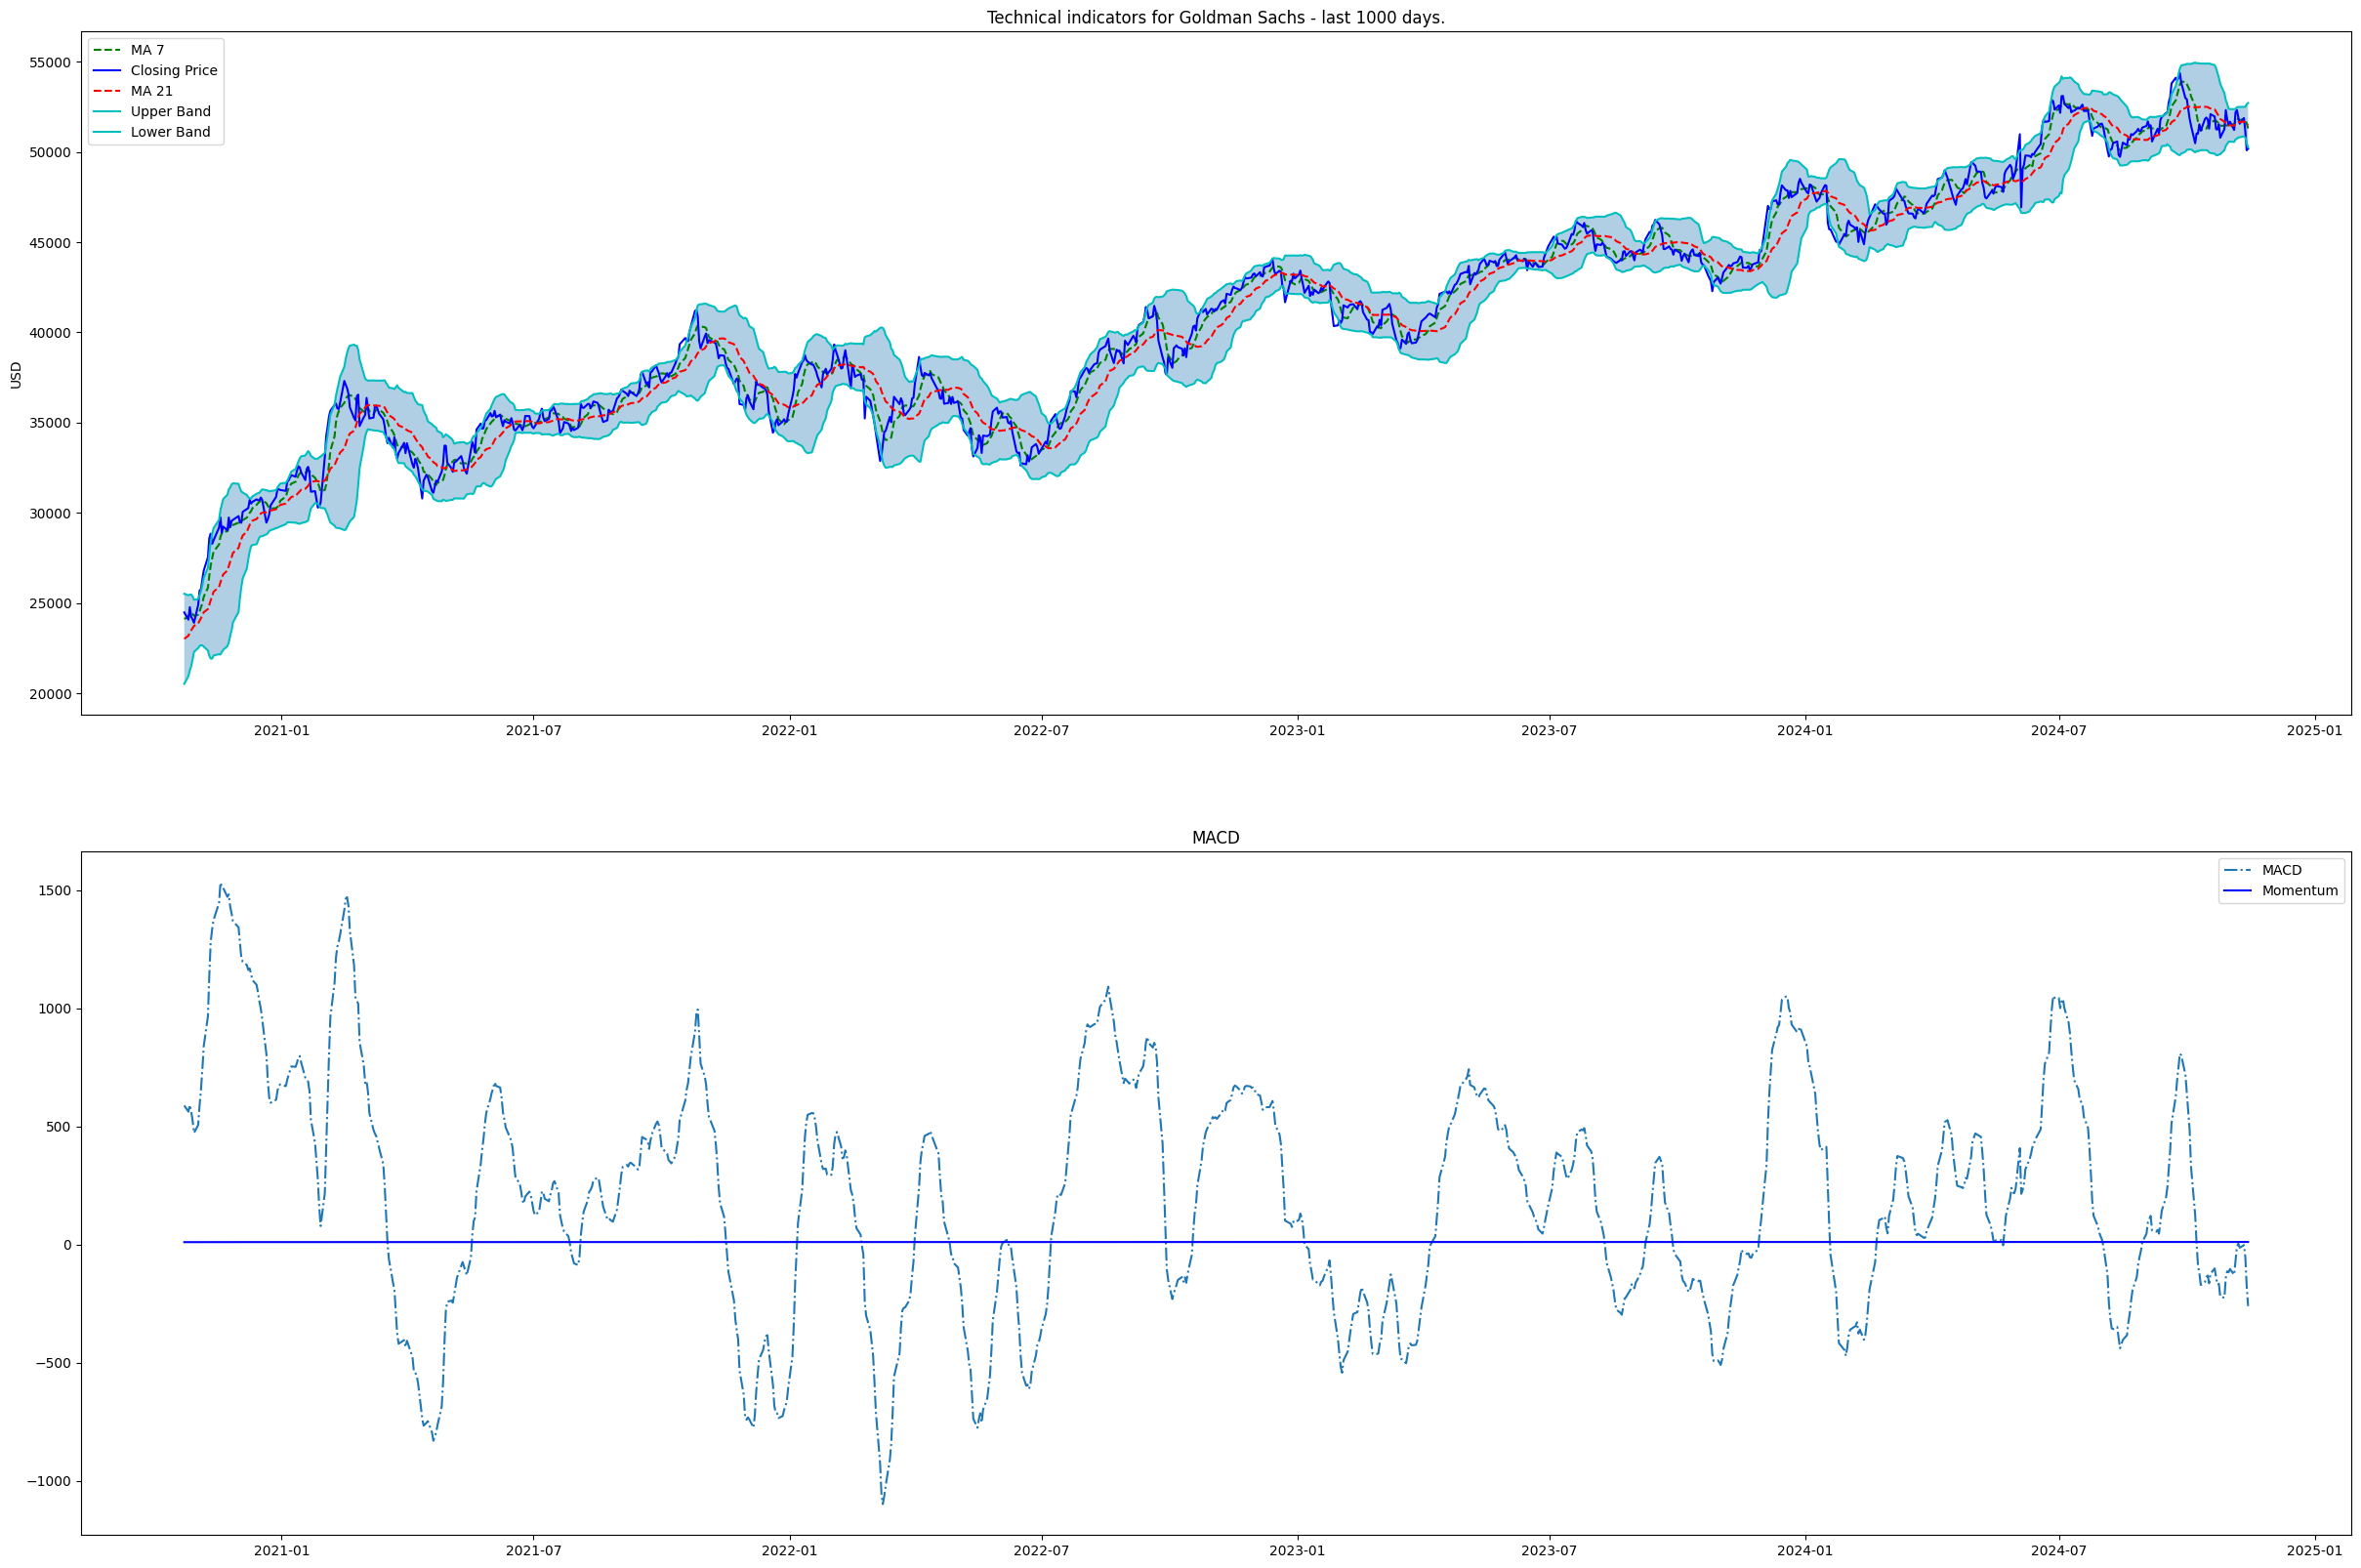

In [16]:
plot_technical_indicators(df, 1000)

Text(0.5, 1.0, 'Params')

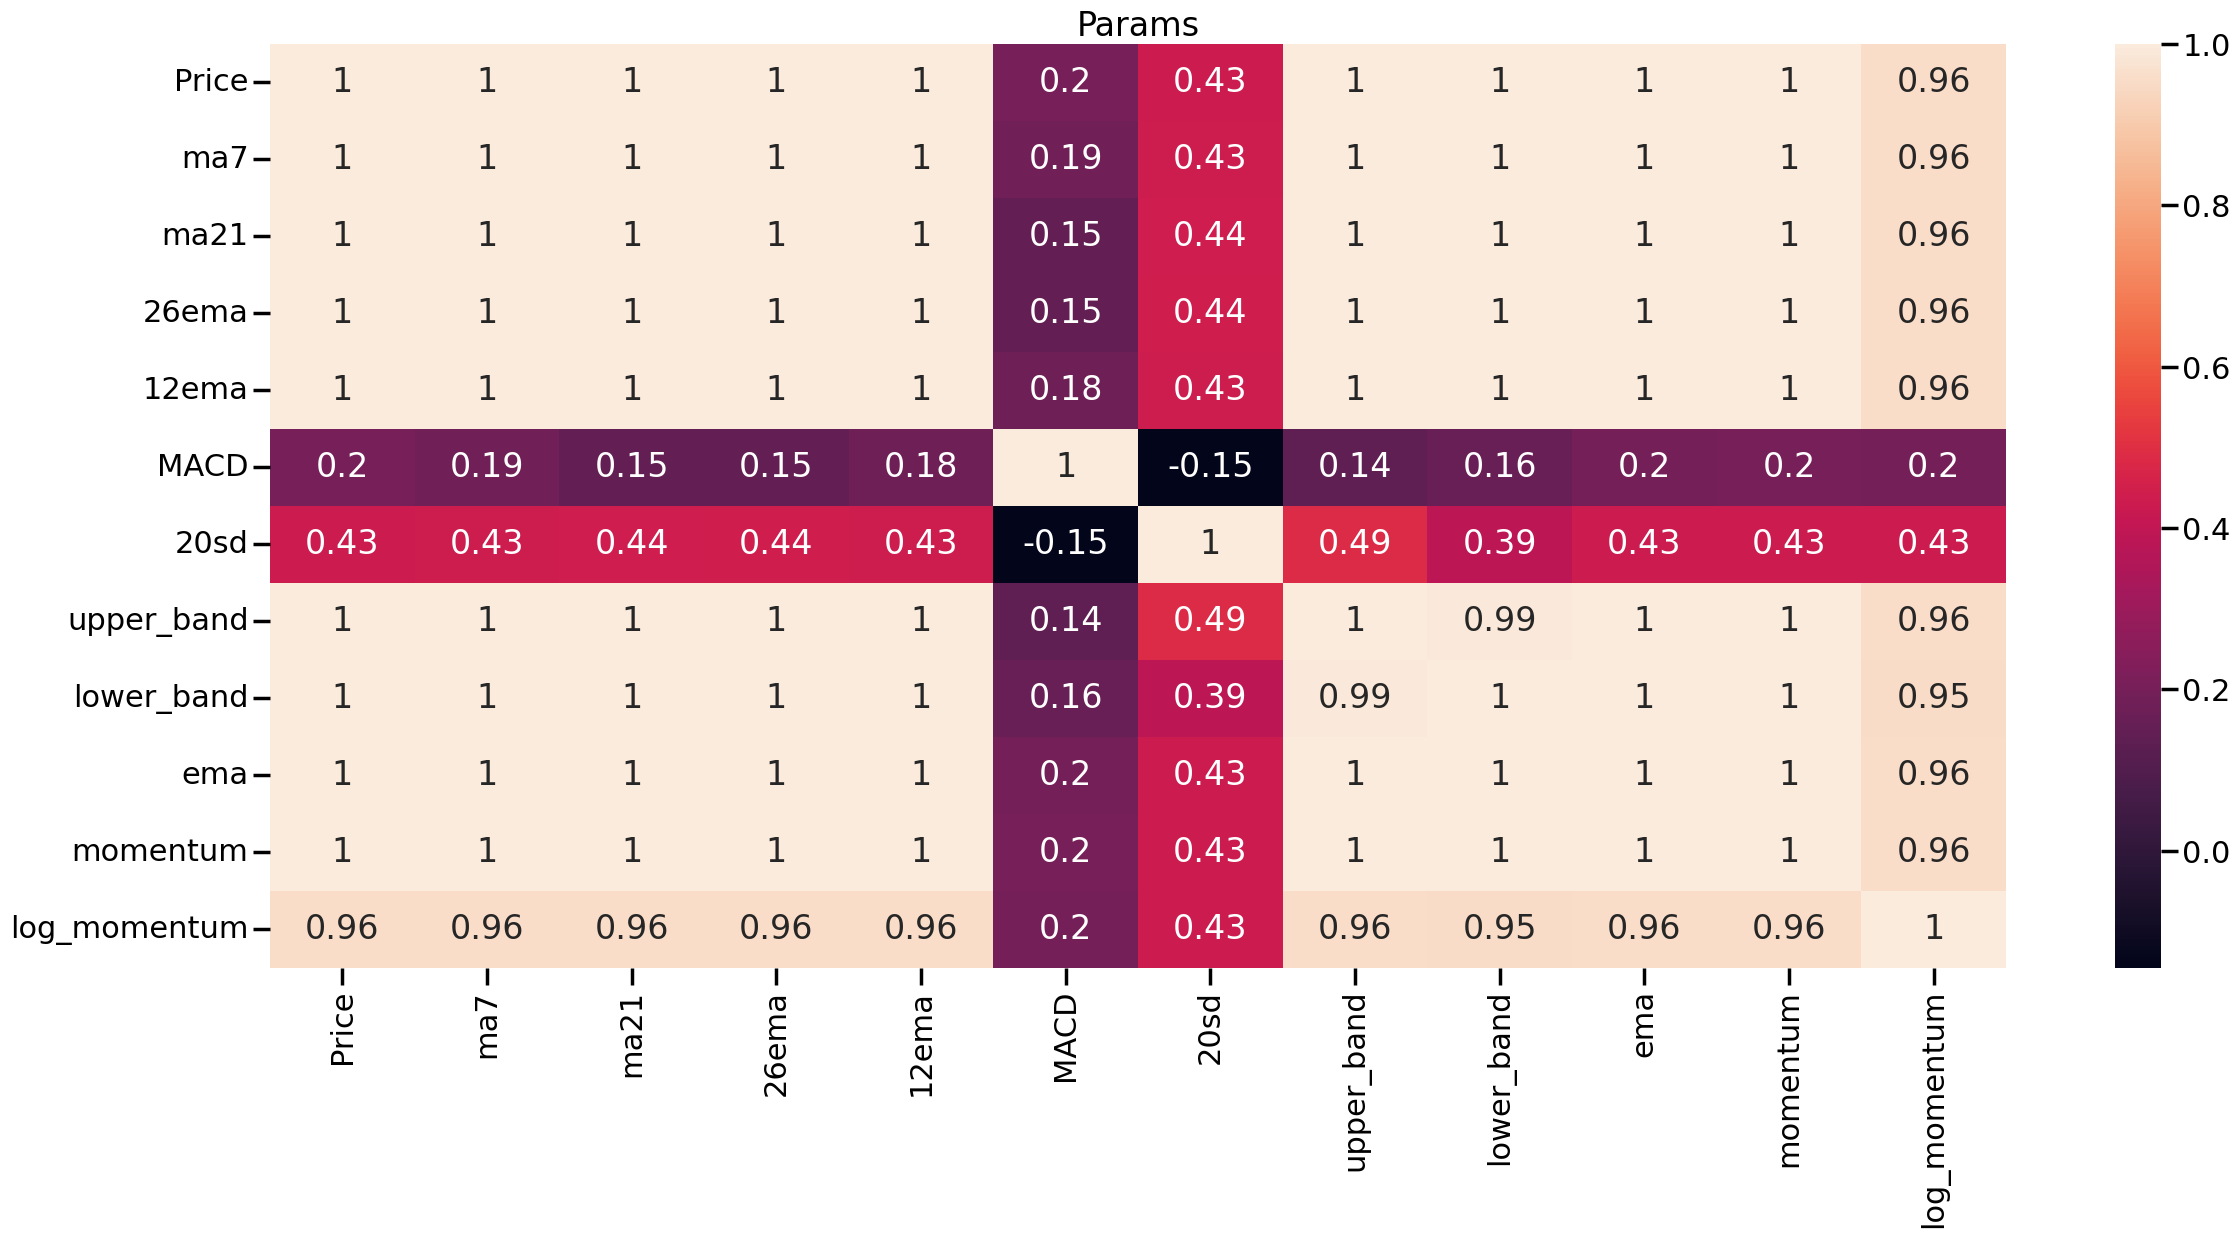

In [17]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(df.corr(), annot = True).set_title('Params')


In [18]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 3915 samples, and 12 features.


In [19]:
df.columns

Index(['Price', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum'],
      dtype='object')

In [20]:
df

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2007-10-16 00:00:00+00:00,8452.101562,8054.791922,7784.471354,7923.731019,8042.612357,118.881339,386.856369,8558.184092,7010.758617,8363.607803,8451.101562,9.042052
2007-10-17 00:00:00+00:00,8099.805664,8122.434012,7841.746861,7939.713390,8051.640133,111.926742,334.374992,8510.496844,7172.996878,8187.739710,8098.805664,8.999472
2007-10-18 00:00:00+00:00,7608.661621,8081.420201,7867.894182,7910.157159,7981.996045,71.838886,288.470113,8444.834409,7290.953956,7801.687651,7607.661621,8.936911
2007-10-19 00:00:00+00:00,7423.713379,7994.728306,7868.939383,7867.378049,7894.519035,27.140986,286.731283,8442.401949,7295.476817,7549.704803,7422.713379,8.912300
2007-10-22 00:00:00+00:00,7567.912109,7910.329311,7877.408343,7841.402490,7843.488268,2.085778,274.234037,8425.876416,7328.940269,7561.843007,7566.912109,8.931540
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08 00:00:00+00:00,51561.199219,51766.692522,51648.144903,51762.159393,51748.464540,-13.694853,420.326637,52488.798177,50807.491630,51709.637665,51560.199219,10.850505
2024-11-11 00:00:00+00:00,51876.750000,51824.035156,51681.690104,51770.647586,51768.200765,-2.446821,408.392667,52498.475437,50864.904771,51821.045888,51875.750000,10.856607
2024-11-12 00:00:00+00:00,51157.800781,51750.306920,51650.304501,51725.251526,51674.293075,-50.958452,422.562655,52495.429812,50805.179191,51378.882484,51156.800781,10.842651


In [21]:
data_training = df[df.index < '2019-01-31'].copy()
data_training

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2007-10-16 00:00:00+00:00,8452.101562,8054.791922,7784.471354,7923.731019,8042.612357,118.881339,386.856369,8558.184092,7010.758617,8363.607803,8451.101562,9.042052
2007-10-17 00:00:00+00:00,8099.805664,8122.434012,7841.746861,7939.713390,8051.640133,111.926742,334.374992,8510.496844,7172.996878,8187.739710,8098.805664,8.999472
2007-10-18 00:00:00+00:00,7608.661621,8081.420201,7867.894182,7910.157159,7981.996045,71.838886,288.470113,8444.834409,7290.953956,7801.687651,7607.661621,8.936911
2007-10-19 00:00:00+00:00,7423.713379,7994.728306,7868.939383,7867.378049,7894.519035,27.140986,286.731283,8442.401949,7295.476817,7549.704803,7422.713379,8.912300
2007-10-22 00:00:00+00:00,7567.912109,7910.329311,7877.408343,7841.402490,7843.488268,2.085778,274.234037,8425.876416,7328.940269,7561.843007,7566.912109,8.931540
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-24 00:00:00+00:00,27266.083984,27428.559431,27316.272972,27208.597766,27369.272579,160.674812,220.655927,27757.584826,26874.961119,27287.727213,27265.083984,10.213362
2019-01-25 00:00:00+00:00,27114.986328,27375.931920,27322.392020,27201.663586,27330.151617,128.488031,212.691272,27747.774564,26897.009476,27172.566623,27113.986328,10.207805
2019-01-28 00:00:00+00:00,26652.740234,27250.833426,27311.654018,27161.002597,27225.934481,64.931885,240.155274,27791.964567,26831.343469,26826.015697,26651.740234,10.190610


In [22]:
data_testing = df[df.index >= '2019-01-31'].copy()
data_testing

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2019-01-31 00:00:00+00:00,27295.132812,26996.808036,27275.187872,27110.569379,27112.501377,1.931998,302.590552,27880.368977,26670.006767,27119.841293,27294.132812,10.214427
2019-02-01 00:00:00+00:00,27085.634766,26973.265346,27281.192522,27108.722371,27108.368052,-0.354318,297.216979,27875.626480,26686.758564,27097.036941,27084.634766,10.206722
2019-02-04 00:00:00+00:00,27186.283203,26961.865234,27280.792504,27114.467617,27120.354998,5.887381,297.344857,27875.482217,26686.102790,27156.534449,27185.283203,10.210431
2019-02-05 00:00:00+00:00,27271.382812,26984.207589,27279.228144,27126.090965,27143.590047,17.499082,297.301775,27873.831693,26684.624594,27233.100025,27270.382812,10.213557
2019-02-06 00:00:00+00:00,27402.031250,27091.249163,27274.125837,27146.530986,27183.350232,36.819246,294.059781,27862.245398,26686.006276,27345.720842,27401.031250,10.218336
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08 00:00:00+00:00,51561.199219,51766.692522,51648.144903,51762.159393,51748.464540,-13.694853,420.326637,52488.798177,50807.491630,51709.637665,51560.199219,10.850505
2024-11-11 00:00:00+00:00,51876.750000,51824.035156,51681.690104,51770.647586,51768.200765,-2.446821,408.392667,52498.475437,50864.904771,51821.045888,51875.750000,10.856607
2024-11-12 00:00:00+00:00,51157.800781,51750.306920,51650.304501,51725.251526,51674.293075,-50.958452,422.562655,52495.429812,50805.179191,51378.882484,51156.800781,10.842651


In [23]:
scalar = MinMaxScaler()

data_training_scaled = scalar.fit_transform(data_training)
print(data_training_scaled.shape)
data_training_scaled

(2493, 12)


array([[0.20466127, 0.1844814 , 0.16702761, ..., 0.2003706 , 0.20466127,
        0.43440039],
       [0.19055816, 0.18722454, 0.16938591, ..., 0.19329456, 0.19055816,
        0.41448403],
       [0.17089668, 0.18556127, 0.17046251, ..., 0.17776178, 0.17089668,
        0.38522202],
       ...,
       [0.93326945, 0.96295368, 0.97105193, ..., 0.94320442, 0.93326945,
        0.97162384],
       [0.93008096, 0.95783643, 0.96996994, ..., 0.93642017, 0.93008096,
        0.97022392],
       [0.94017286, 0.95373418, 0.9693137 , ..., 0.94092079, 0.94017286,
        0.97464054]])

In [24]:
X_train = []
y_train = []

In [25]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training_scaled[i-60: i])
    y_train.append(data_training_scaled[i, 0])

In [26]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((2433, 60, 12), (2433,))

In [27]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 12)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 60)              │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 180,961 (706.88 KB)

 Trainable params: 180,961 (706.88 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
regressor.fit(X_train, y_train, epochs=50, batch_size = 64)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 286ms/step - loss: 0.1110
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 290ms/step - loss: 0.0121
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 259ms/step - loss: 0.0084
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 292ms/step - loss: 0.0072
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 291ms/step - loss: 0.0076
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 282ms/step - loss: 0.0064
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - loss: 0.0056
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 256ms/step - loss: 0.0072
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 290ms/step - loss: 0.0063
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - loss: 0.0053
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - loss: 0.0123
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 274ms/step - loss: 0.0061
Epoch 13/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 294ms/step - loss: 0.0050
Epoch 14/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - loss: 0.0092
Epoch 15/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 2

In [34]:
past_60 = data_training.tail(60)

# Call pd.concat and pass DataFrames as a list
dt = pd.concat([past_60, data_testing], ignore_index=True)
dt

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,25701.351562,25026.065848,25021.713728,25326.704352,25142.846290,-183.858062,359.701904,25741.117535,24302.309920,25543.932095,25700.351562,10.154260
1,25731.900391,25156.743025,25065.184617,25356.718874,25233.469998,-123.248875,388.027196,25841.239009,24289.130224,25669.244292,25730.900391,10.155448
2,25597.703125,25324.876674,25120.162574,25374.569559,25289.505864,-85.063695,377.127089,25874.416753,24365.908396,25621.550181,25596.703125,10.150219
3,25737.201172,25435.989955,25173.454892,25401.431160,25358.382065,-43.049095,381.673125,25936.801142,24410.108643,25698.650841,25736.201172,10.155654
4,25770.701172,25573.595703,25232.661365,25428.784494,25421.815774,-6.968720,372.769716,25978.200797,24487.121934,25746.684395,25769.701172,10.156955
...,...,...,...,...,...,...,...,...,...,...,...,...
1477,51561.199219,51766.692522,51648.144903,51762.159393,51748.464540,-13.694853,420.326637,52488.798177,50807.491630,51709.637665,51560.199219,10.850505
1478,51876.750000,51824.035156,51681.690104,51770.647586,51768.200765,-2.446821,408.392667,52498.475437,50864.904771,51821.045888,51875.750000,10.856607
1479,51157.800781,51750.306920,51650.304501,51725.251526,51674.293075,-50.958452,422.562655,52495.429812,50805.179191,51378.882484,51156.800781,10.842651
1480,50088.351562,51589.321429,51563.749814,51603.999677,51430.302073,-173.697604,537.967227,52639.684269,50487.815359,50518.528536,50087.351562,10.821524


In [35]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(1482, 12)


array([[0.23450057, 0.20193035, 0.18327919, ..., 0.2203139 , 0.23450057,
        0.3581842 ],
       [0.23531612, 0.20554374, 0.18457085, ..., 0.22371552, 0.23531612,
        0.35920162],
       [0.2317335 , 0.21019284, 0.18620442, ..., 0.22242085, 0.2317335 ,
        0.35472317],
       ...,
       [0.91410221, 0.94088819, 0.97450216, ..., 0.92160775, 0.91410221,
        0.94775881],
       [0.88555151, 0.93643675, 0.97193034, ..., 0.89825331, 0.88555151,
        0.92966458],
       [0.88798622, 0.92842698, 0.96963605, ..., 0.8921189 , 0.88798622,
        0.93122259]])

In [36]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1422, 60, 12), (1422,))

In [37]:
y_pred = regressor.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


In [38]:
y_pred

array([[0.2746669 ],
       [0.27424082],
       [0.27371296],
       ...,
       [0.8796215 ],
       [0.8808651 ],
       [0.8819182 ]], dtype=float32)

In [39]:
scale = 1/scalar.scale_[0]

In [40]:
y_pred = y_pred*scale
y_test = y_test*scale

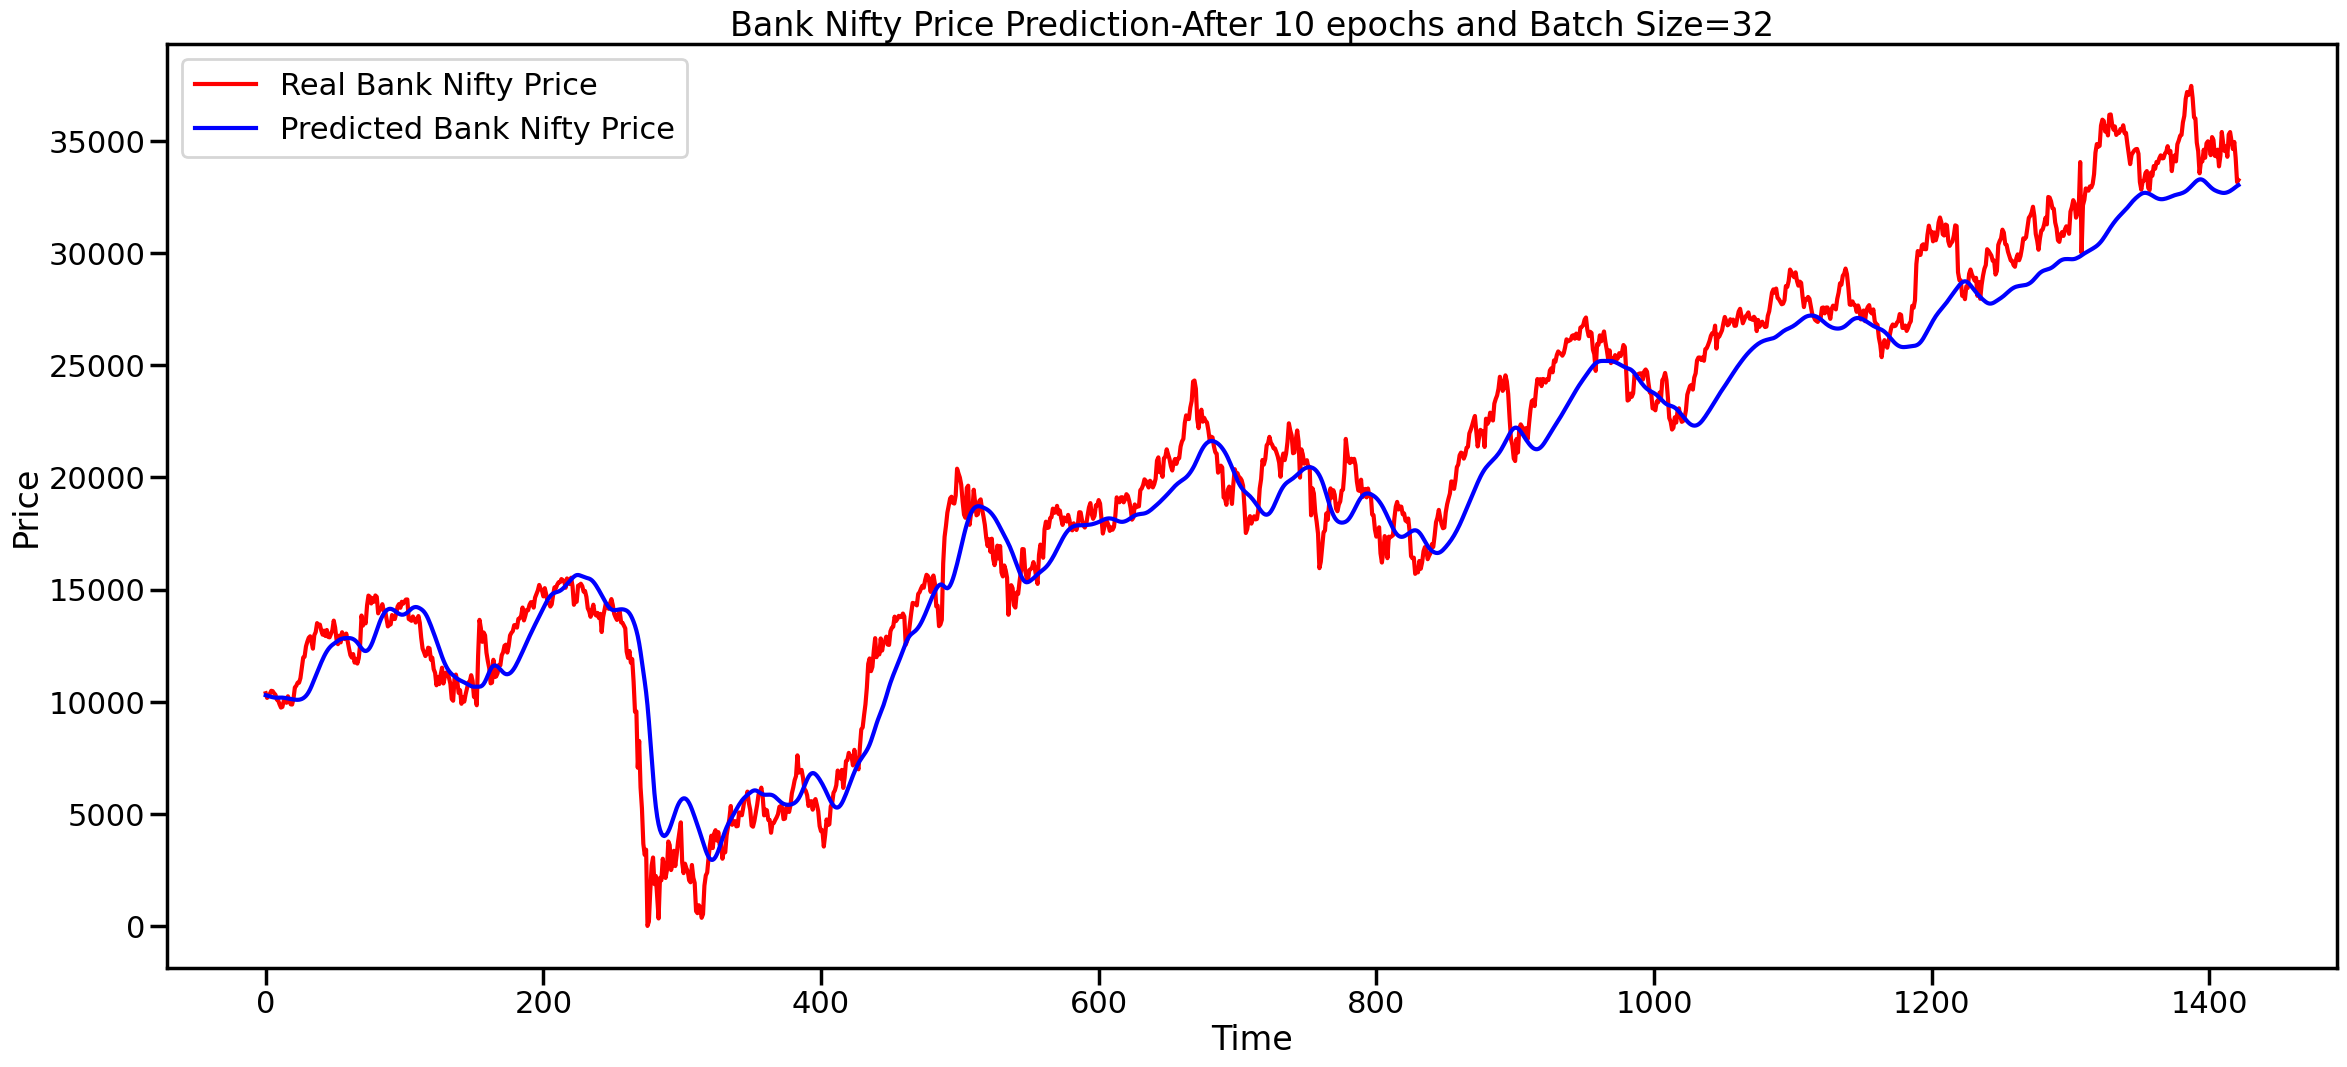

In [41]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

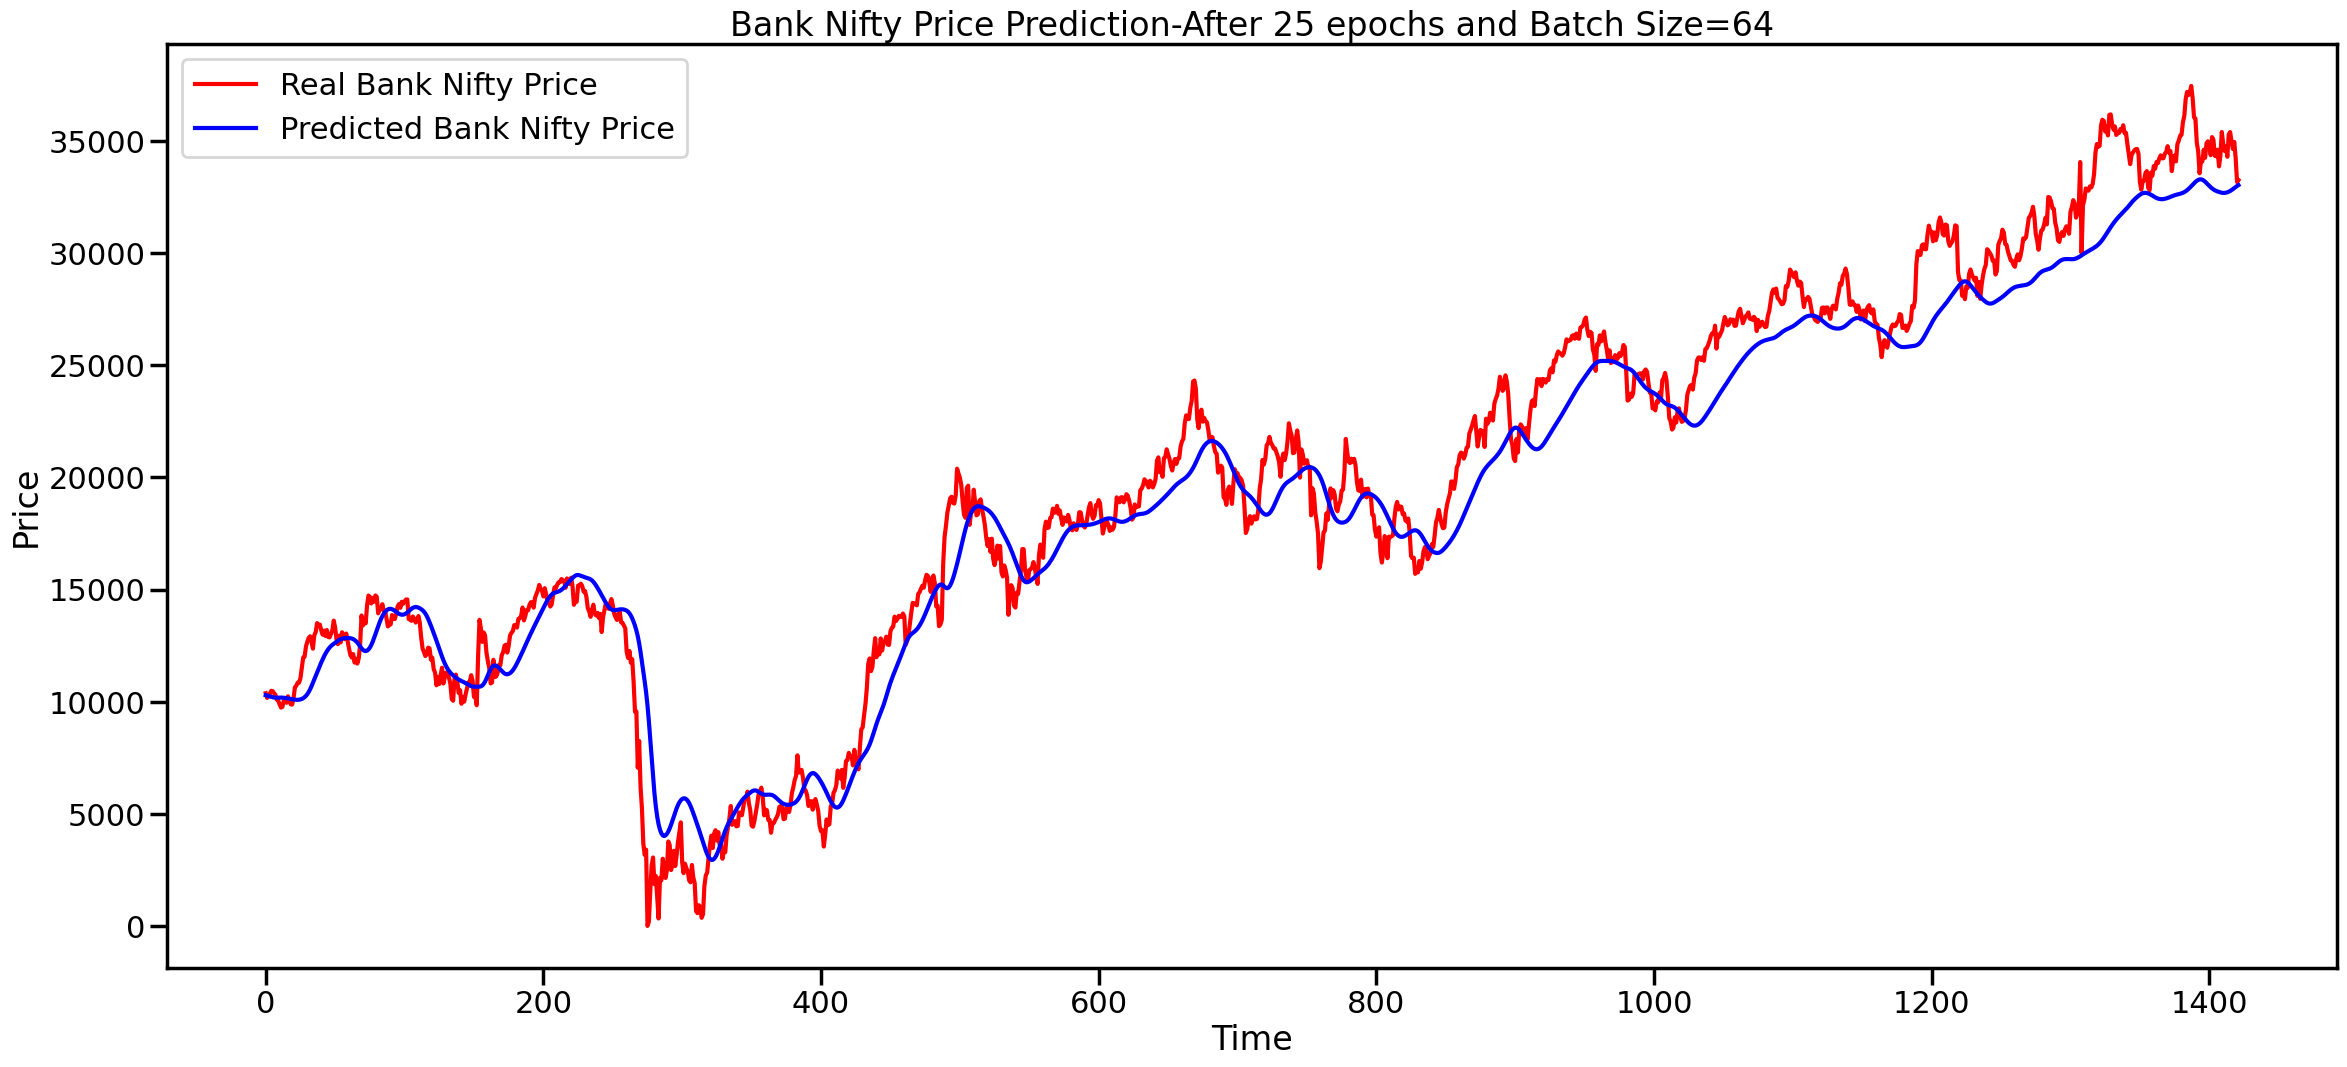

In [42]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 25 epochs and Batch Size=64')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

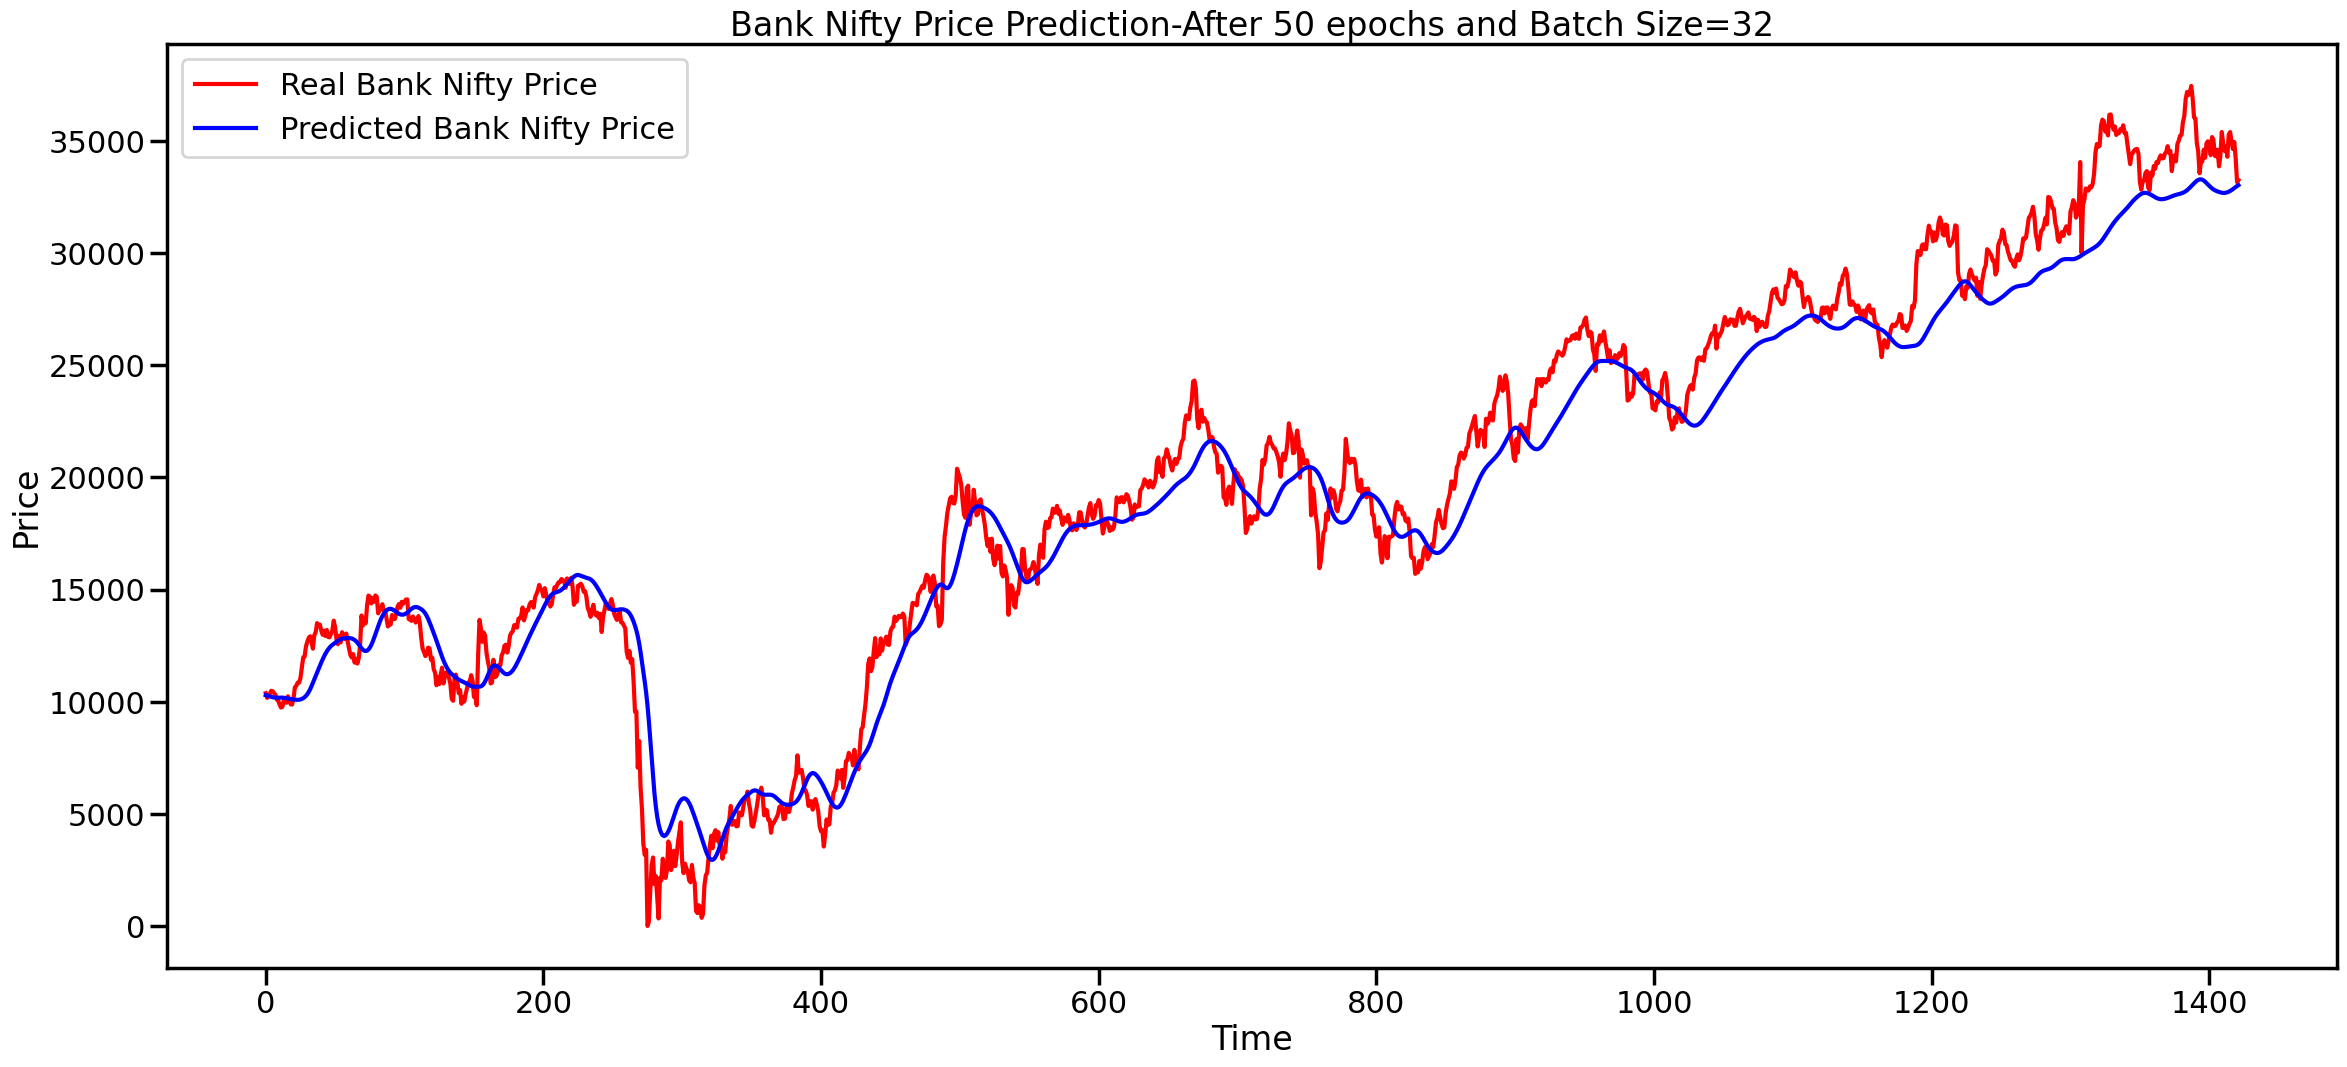

In [43]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 50 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()